In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
data = pd.read_csv('resources/movies_training.csv', index_col=0)

In [6]:
data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'G', 'PG', 'PG-13', 'R',
       'gross'],
      dtype='object')

## Determine our best model 

Do we want to transform the target variable by taking the log or square root of it?

In [23]:
target = np.log(data['gross'])
features = data.drop(['gross'], axis=1)


Create a train test split of our data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)


In [9]:
X_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,G,PG,PG-13,R
2830,157.0,125.0,448.0,93.0,273.0,529,1.0,140.0,10000000.0,2004.0,114.0,8.1,0,0,1,0
1065,142.0,102.0,148.0,135.0,8000.0,9176,4.0,343.0,48000000.0,2001.0,973.0,5.7,0,0,1,0
80,453.0,124.0,4000.0,4000.0,21000.0,48638,4.0,723.0,200000000.0,2010.0,19000.0,7.0,0,0,1,0
3764,61.0,90.0,4.0,556.0,2000.0,5202,0.0,202.0,36998505.3,2006.0,936.0,7.0,0,0,0,1
2402,195.0,98.0,72.0,566.0,1000.0,3151,2.0,485.0,18000000.0,2003.0,624.0,7.1,0,0,0,1


How do you want to handle extreme values for some of the continuous columns?

In [10]:
X_train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,G,PG,PG-13,R
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1.938000e+03,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,188.203818,109.404541,752.603199,898.403095,8448.017544,12749.148607,1.436691,359.930341,4.848001e+07,2006.297214,2316.650155,6.402425,0.025800,0.148607,0.410733,0.409701
std,124.788044,19.787551,2946.005715,2145.737933,11738.067750,17123.788297,2.077983,415.673179,7.467260e+07,5.543967,5270.858278,1.057827,0.158578,0.355792,0.492094,0.491905
min,3.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.500000e+04,1996.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000
25%,97.000000,96.000000,12.000000,223.000000,820.000000,2176.000000,0.000000,127.250000,1.500000e+07,2002.000000,436.000000,5.800000,0.000000,0.000000,0.000000,0.000000
50%,160.000000,106.000000,65.000000,471.500000,2000.000000,4861.500000,1.000000,233.000000,3.400000e+07,2006.000000,722.000000,6.500000,0.000000,0.000000,0.000000,0.000000
75%,248.000000,119.000000,234.000000,735.500000,14000.000000,17880.500000,2.000000,432.000000,6.000000e+07,2011.000000,1000.000000,7.100000,0.000000,0.000000,1.000000,1.000000
max,813.000000,280.000000,23000.000000,23000.000000,164000.000000,303717.000000,31.000000,5060.000000,2.400000e+09,2016.000000,137000.000000,8.900000,1.000000,1.000000,1.000000,1.000000


In [11]:
extreme_cols = ['budget', 'cast_total_facebook_likes', 'director_facebook_likes', 'actor_3_facebook_likes']

Create any new features, polynomial or interaction terms?

In [25]:
X_train['G_budget'] = X_train['G']*X_train['budget']
X_train['PG_budget'] = X_train['PG']*X_train['budget']
X_train['PG-13_budget'] = X_train['PG-13']*X_train['budget']
X_train['R_budget'] = X_train['R']*X_train['budget']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [14]:
X_train

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,G,PG,PG-13,R,G_budget,PG_budget,PG-13_budget,R_budget
2830,157.0,125.0,448.0,93.0,273.0,529,1.0,140.0,10000000.0,2004.0,114.0,8.1,0,0,1,0,0.0,0.0,10000000.0,0.0
1065,142.0,102.0,148.0,135.0,8000.0,9176,4.0,343.0,48000000.0,2001.0,973.0,5.7,0,0,1,0,0.0,0.0,48000000.0,0.0
80,453.0,124.0,4000.0,4000.0,21000.0,48638,4.0,723.0,200000000.0,2010.0,19000.0,7.0,0,0,1,0,0.0,0.0,200000000.0,0.0
3764,61.0,90.0,4.0,556.0,2000.0,5202,0.0,202.0,36998505.3,2006.0,936.0,7.0,0,0,0,1,0.0,0.0,0.0,36998505.3
2402,195.0,98.0,72.0,566.0,1000.0,3151,2.0,485.0,18000000.0,2003.0,624.0,7.1,0,0,0,1,0.0,0.0,0.0,18000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,289.0,122.0,2000.0,571.0,26000.0,28328,0.0,161.0,100000000.0,2015.0,911.0,7.0,0,0,1,0,0.0,0.0,100000000.0,0.0
230,207.0,134.0,123.0,567.0,14000.0,17159,0.0,666.0,105000000.0,2004.0,850.0,6.7,0,0,1,0,0.0,0.0,105000000.0,0.0
192,330.0,101.0,176.0,282.0,11000.0,12406,1.0,514.0,110000000.0,2010.0,702.0,6.4,0,0,1,0,0.0,0.0,110000000.0,0.0
506,272.0,105.0,545.0,74.0,795.0,1099,0.0,308.0,80000000.0,2014.0,172.0,5.6,0,0,1,0,0.0,0.0,80000000.0,0.0


What type of scaler do we want to use?

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)


What feature selection methods will we implement?

Fit our model

In [31]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = np.exp(lasso.predict(X_train))


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Error: '+ str(train_rmse) )




Training Error: 130221503.82534926


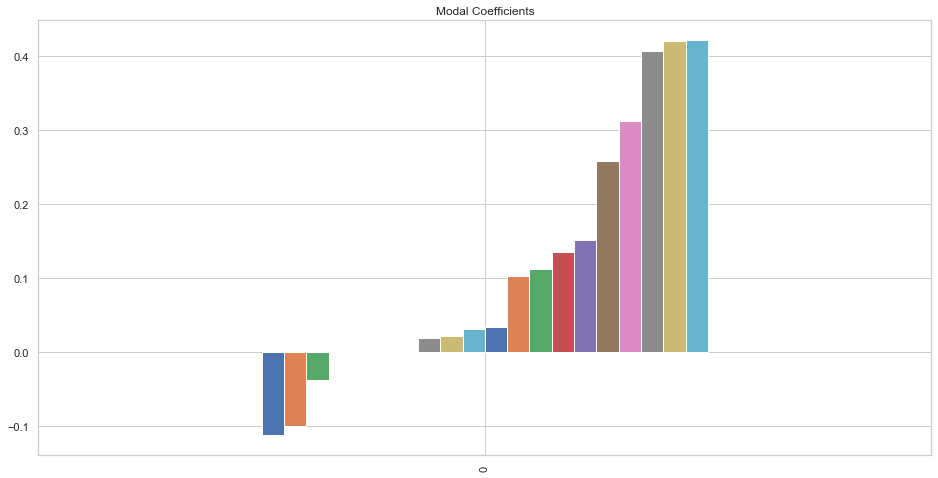

In [29]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [30]:
lasso_coef01.T

,0
imdb_score,-0.112928
title_year,-0.099969
R,-0.038419
director_facebook_likes,-0.000000
actor_1_facebook_likes,-0.000000
PG-13_budget,0.000000
actor_2_facebook_likes,0.000000
actor_3_facebook_likes,0.018251
budget,0.022214
duration,0.031450


Evaluate how our model performance on the test set. 

## Once we are happy with our performance and have solidified the process, let's refit this process to the entire dataset.  

In [ ]:
final_scaler=StandardScaler() #pickle this

In [ ]:
final_scaler.fit_transform(features)

In [ ]:
final_model=LinearRegression() #pickle this pickle(final_scaler)
final_model.fit(features,target)
#notebook ends here

## Now with our model including more data points, let's apply it to the holdout set. 

In [15]:
#put in notebook to keep it cleaner
#do feature engineering and cleaning for holdout - same columns before scaler on previous same as previous
#then do pickles
#final_scaler=read_pickle(filename)
#final_model=read_pickle(filename)
holdout = pd.read_csv('resources/movies_holdout_features.csv', index_col=0)

Remember we have to perform the same transformations on our holdout data (feature engineering, extreme values and scaling) that we performed on the original data.  

In [ ]:
transformed_holdout=final_scaler(holdout)

Predict using the fitted model. 

In [ ]:
final_answers=final_model.predict(transformed_holdout)

Grade our predictions.  

In [ ]:
final_answers.to_csv('housing_preds_JBEB') #then export and send to sean